In [81]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import log_loss, mean_squared_error

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
# warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')

import shap
import helper_functions as helper
from matplotlib import pyplot as plt

# Importing

In [2]:
def import_data(data):    
    return pd.read_csv("train_test_data/" + data + ".csv", index_col="uid").drop("Unnamed: 0", axis="columns")        

X_train = import_data("X_train")
X_test = import_data("X_test")
y_train = import_data("y_train")
y_test = import_data("y_test")

X_train.head()
X_test.head()
y_train.head()
y_test.head()

,chargetime_count_wk_1,chargetime_count_wk_2,chargetime_count_wk_3,chargetime_count_wk_4,chargetime_count_wk_5,chargetime_count_wk_6,chargetime_count_wk_7,chargetime_count_wk_8,chargetime_count_wk_9,chargetime_count_wk_10,...,locktime_q3_wk_1,locktime_q3_wk_2,locktime_q3_wk_3,locktime_q3_wk_4,locktime_q3_wk_5,locktime_q3_wk_6,locktime_q3_wk_7,locktime_q3_wk_8,locktime_q3_wk_9,locktime_q3_wk_10
uid,,,,,,,,,,,,,,,,,,,,,
u00,75,65,60,47,31,18,12,7,3,1,...,10751.25,10827.5,10827.50,10924.25,10880.75,10848.50,10473.0,9785.0,9555.50,6308.0
u01,44,39,36,29,23,19,12,10,5,3,...,21632.50,21658.0,21624.00,24227.00,25298.00,23310.00,20985.0,21298.0,15541.25,9186.5
u02,105,98,88,76,62,49,38,30,19,4,...,14639.50,14191.5,14451.00,14502.50,14896.00,17611.75,14191.5,14777.5,18333.00,14254.5
u04,60,54,46,41,31,23,14,8,2,0,...,22332.00,22375.5,22700.75,22718.00,23324.00,23942.00,24879.0,25229.0,26646.00,NaN
u08,107,102,92,79,62,50,38,28,17,6,...,10007.50,10044.5,9948.00,9989.00,9918.00,9761.00,9903.0,9933.0,9989.00,8869.5


,chargetime_count_wk_1,chargetime_count_wk_2,chargetime_count_wk_3,chargetime_count_wk_4,chargetime_count_wk_5,chargetime_count_wk_6,chargetime_count_wk_7,chargetime_count_wk_8,chargetime_count_wk_9,chargetime_count_wk_10,...,locktime_q3_wk_1,locktime_q3_wk_2,locktime_q3_wk_3,locktime_q3_wk_4,locktime_q3_wk_5,locktime_q3_wk_6,locktime_q3_wk_7,locktime_q3_wk_8,locktime_q3_wk_9,locktime_q3_wk_10
uid,,,,,,,,,,,,,,,,,,,,,
u03,47,41,37,30,21,10,6,1,0,0,...,24734.50,28016.00,28016.00,24631.00,25801.00,17806.00,16529.50,17806.0,5735.0,NaN
u27,73,67,52,47,38,31,19,18,12,8,...,13938.00,14609.75,13951.00,14491.00,14349.50,18096.25,18459.25,19254.0,19097.5,18793.25
u05,72,68,61,48,38,29,18,14,10,4,...,18138.25,18786.25,19550.75,20192.00,25011.50,22830.50,17359.75,17141.5,17448.5,16834.25
u43,69,69,57,49,44,35,25,21,14,7,...,16965.25,16965.25,17061.00,17221.25,17900.75,21970.00,24245.25,22225.0,18883.0,9766.50
u56,39,32,21,18,15,13,9,9,6,3,...,20992.00,21379.75,22694.75,23458.00,23239.25,25084.25,24099.00,24099.0,26136.0,24657.50


,panas_pos_raw_pre,panas_neg_raw_pre,flourishing_scale_raw_pre,panas_pos_imp_pre,panas_neg_imp_pre,flourishing_scale_imp_pre,panas_pos_raw_class_pre,panas_neg_raw_class_pre,flourishing_scale_raw_class_pre,panas_pos_imp_class_pre,...,flourishing_scale_raw_post,panas_pos_imp_post,panas_neg_imp_post,flourishing_scale_imp_post,panas_pos_raw_class_post,panas_neg_raw_class_post,flourishing_scale_raw_class_post,panas_pos_imp_class_post,panas_neg_imp_class_post,flourishing_scale_imp_class_post
uid,,,,,,,,,,,,,,,,,,,,,
u00,32.0,NaN,NaN,32.0,33.0,49.0,1.0,NaN,NaN,1.0,...,45.0,31.0,24.0,45.0,1.0,1.0,1.0,1.0,1.0,1.0
u01,30.0,19.0,45.0,30.0,19.0,45.0,1.0,1.0,1.0,1.0,...,46.0,27.0,17.0,46.0,0.0,0.0,1.0,0.0,0.0,1.0
u02,23.0,15.0,46.0,23.0,15.0,46.0,0.0,0.0,1.0,0.0,...,44.0,28.0,13.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0
u04,27.0,14.0,27.0,27.0,14.0,27.0,0.0,0.0,0.0,0.0,...,33.0,34.0,19.0,33.0,1.0,1.0,0.0,1.0,1.0,0.0
u08,30.0,26.0,NaN,30.0,26.0,38.0,1.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,panas_pos_raw_pre,panas_neg_raw_pre,flourishing_scale_raw_pre,panas_pos_imp_pre,panas_neg_imp_pre,flourishing_scale_imp_pre,panas_pos_raw_class_pre,panas_neg_raw_class_pre,flourishing_scale_raw_class_pre,panas_pos_imp_class_pre,...,flourishing_scale_raw_post,panas_pos_imp_post,panas_neg_imp_post,flourishing_scale_imp_post,panas_pos_raw_class_post,panas_neg_raw_class_post,flourishing_scale_raw_class_post,panas_pos_imp_class_post,panas_neg_imp_class_post,flourishing_scale_imp_class_post
uid,,,,,,,,,,,,,,,,,,,,,
u03,30.0,27.0,34.0,30.0,27.0,34.0,1.0,1.0,0.0,1.0,...,31.0,25.0,20.0,31.0,0.0,1.0,0.0,0.0,1.0,0.0
u27,23.0,18.0,31.0,23.0,18.0,31.0,0.0,0.0,0.0,0.0,...,31.0,19.0,23.0,31.0,0.0,1.0,0.0,0.0,1.0,0.0
u05,32.0,27.0,48.0,32.0,27.0,48.0,1.0,1.0,1.0,1.0,...,50.0,33.0,17.0,50.0,1.0,0.0,1.0,1.0,0.0,1.0
u43,31.0,18.0,47.0,31.0,18.0,47.0,1.0,0.0,1.0,1.0,...,42.0,32.0,21.0,42.0,1.0,1.0,0.0,1.0,1.0,0.0
u56,22.0,9.0,46.0,22.0,9.0,46.0,0.0,0.0,1.0,0.0,...,48.0,29.0,15.0,48.0,1.0,0.0,1.0,1.0,0.0,1.0


# Pre-processing

In [3]:
X_train.head()
X_train.describe()

,chargetime_count_wk_1,chargetime_count_wk_2,chargetime_count_wk_3,chargetime_count_wk_4,chargetime_count_wk_5,chargetime_count_wk_6,chargetime_count_wk_7,chargetime_count_wk_8,chargetime_count_wk_9,chargetime_count_wk_10,...,locktime_q3_wk_1,locktime_q3_wk_2,locktime_q3_wk_3,locktime_q3_wk_4,locktime_q3_wk_5,locktime_q3_wk_6,locktime_q3_wk_7,locktime_q3_wk_8,locktime_q3_wk_9,locktime_q3_wk_10
uid,,,,,,,,,,,,,,,,,,,,,
u00,75,65,60,47,31,18,12,7,3,1,...,10751.25,10827.5,10827.50,10924.25,10880.75,10848.50,10473.0,9785.0,9555.50,6308.0
u01,44,39,36,29,23,19,12,10,5,3,...,21632.50,21658.0,21624.00,24227.00,25298.00,23310.00,20985.0,21298.0,15541.25,9186.5
u02,105,98,88,76,62,49,38,30,19,4,...,14639.50,14191.5,14451.00,14502.50,14896.00,17611.75,14191.5,14777.5,18333.00,14254.5
u04,60,54,46,41,31,23,14,8,2,0,...,22332.00,22375.5,22700.75,22718.00,23324.00,23942.00,24879.0,25229.0,26646.00,NaN
u08,107,102,92,79,62,50,38,28,17,6,...,10007.50,10044.5,9948.00,9989.00,9918.00,9761.00,9903.0,9933.0,9989.00,8869.5


,chargetime_count_wk_1,chargetime_count_wk_2,chargetime_count_wk_3,chargetime_count_wk_4,chargetime_count_wk_5,chargetime_count_wk_6,chargetime_count_wk_7,chargetime_count_wk_8,chargetime_count_wk_9,chargetime_count_wk_10,...,locktime_q3_wk_1,locktime_q3_wk_2,locktime_q3_wk_3,locktime_q3_wk_4,locktime_q3_wk_5,locktime_q3_wk_6,locktime_q3_wk_7,locktime_q3_wk_8,locktime_q3_wk_9,locktime_q3_wk_10
count,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,38.000000,38.000000,38.000000,38.000000,33.000000
mean,69.92500,64.825000,57.150000,48.700000,39.750000,30.175000,23.375000,16.925000,10.625000,4.350000,...,15484.581250,15394.412500,15327.656250,15482.525000,15914.237500,16174.302632,15789.644737,15566.782895,14774.980263,13318.765152
std,34.36112,32.503954,29.627214,26.182006,22.255797,18.395774,16.060283,13.858974,9.818056,4.329683,...,4244.856597,4536.123168,4261.853705,4329.152417,4867.418336,5697.730009,5036.738170,5358.596751,5886.549104,6343.341445
min,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9093.500000,9310.250000,8876.500000,8715.000000,8597.000000,8007.000000,8007.000000,6791.000000,5024.750000,5016.250000
25%,47.75000,42.750000,35.750000,31.750000,28.750000,20.500000,12.000000,7.000000,3.000000,1.000000,...,11844.500000,11407.937500,11438.375000,11902.625000,12197.875000,10982.312500,11083.125000,10599.250000,10209.437500,8869.500000
50%,67.00000,61.000000,54.000000,44.500000,35.500000,27.000000,21.000000,15.000000,10.000000,4.000000,...,15522.375000,15497.000000,15404.750000,15046.500000,14801.500000,14533.375000,15262.500000,14836.625000,14240.625000,12303.750000
75%,87.25000,79.750000,70.500000,62.250000,51.500000,40.250000,31.500000,21.500000,15.250000,6.000000,...,17178.312500,17275.625000,17540.062500,18051.125000,18110.375000,20341.000000,19917.187500,19030.750000,18976.000000,18073.250000
max,154.00000,145.000000,130.000000,117.000000,101.000000,78.000000,74.000000,70.000000,49.000000,21.000000,...,27303.250000,29325.250000,25642.500000,26184.000000,25706.000000,28906.000000,26997.750000,27756.000000,28073.000000,26861.250000


In [4]:
y_train.describe()

,panas_pos_raw_pre,panas_neg_raw_pre,flourishing_scale_raw_pre,panas_pos_imp_pre,panas_neg_imp_pre,flourishing_scale_imp_pre,panas_pos_raw_class_pre,panas_neg_raw_class_pre,flourishing_scale_raw_class_pre,panas_pos_imp_class_pre,...,flourishing_scale_raw_post,panas_pos_imp_post,panas_neg_imp_post,flourishing_scale_imp_post,panas_pos_raw_class_post,panas_neg_raw_class_post,flourishing_scale_raw_class_post,panas_pos_imp_class_post,panas_neg_imp_class_post,flourishing_scale_imp_class_post
count,36.000000,34.000000,33.000000,37.000000,37.000000,37.000000,36.000000,34.000000,33.000000,37.000000,...,28.000000,30.000000,30.000000,28.000000,29.000000,30.000000,28.000000,30.000000,30.000000,28.000000
mean,28.500000,19.382353,42.636364,28.513514,19.810811,42.972973,0.527778,0.441176,0.545455,0.540541,...,43.178571,29.600000,21.766667,43.178571,0.517241,0.566667,0.500000,0.533333,0.566667,0.500000
std,6.235841,7.781153,9.266263,6.149172,7.978575,9.114965,0.506309,0.503995,0.505650,0.505228,...,9.412575,6.881259,8.067317,9.412575,0.508548,0.504007,0.509175,0.507416,0.504007,0.509175
min,13.000000,10.000000,15.000000,13.000000,10.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,16.000000,17.000000,11.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,14.000000,41.000000,26.000000,14.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,40.500000,25.250000,15.000000,40.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,17.500000,45.000000,29.000000,18.000000,45.000000,1.000000,0.000000,1.000000,1.000000,...,44.500000,31.000000,20.000000,44.500000,1.000000,1.000000,0.500000,1.000000,1.000000,0.500000
75%,32.250000,21.750000,49.000000,32.000000,25.000000,49.000000,1.000000,1.000000,1.000000,1.000000,...,48.250000,34.000000,27.500000,48.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,42.000000,43.000000,54.000000,42.000000,43.000000,56.000000,1.000000,1.000000,1.000000,1.000000,...,56.000000,43.000000,37.000000,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# KNN

In [5]:
features_wk_10 = [
    "chargetime_count_wk_10"
    , "chargetime_max_wk_10"
    , "chargetime_mean_wk_10"
    , "chargetime_median_wk_10"
    , "chargetime_min_wk_10"
    , "chargetime_q1_wk_10"
    , "chargetime_q3_wk_10"
    , "activity_stationary_ratio_wk_10"
    , "activity_running_ratio_wk_10"
    , "audio_silent_ratio_wk_10"
    , "audio_noisy_ratio_wk_10"
    , "bluetooth_avg_wk_10"
    , "conversation_hours_wk_10"
    , "conversation_freq_wk_10"
    , "speed_mean_wk_10"
    , "speed_max_wk_10"
    , "speed_sd_wk_10"
    , "travelstate_time_stationary_wk_10"
    , "travelstate_time_moving_wk_10"
    , "outdoor_time_wk_10"
    , "indoor_time_wk_10"
    , "indoor_dist_wk_10"
    , "outdoors_dist_wk_10"
    , "altitude_mean_wk_10"
    , "altitude_sd_wk_10"
    , "altitude_max_wk_10"
    , "altitude_min_wk_10"
    , "location_count_wk_10"
    , "location_1_time_wk_10"
    , "location_2_time_wk_10"
    , "location_3_time_wk_10"
    , "location_4_time_wk_10"
    , "location_5_time_wk_10"
    , "bearing_north_time_wk_10"
    , "bearing_east_time_wk_10"
    , "bearing_south_time_wk_10"
    , "bearing_west_time_wk_10"
    , "sleep_max_wk_10"
    , "sleep_mean_wk_10"
    , "sleep_med_wk_10"
    , "sleep_min_wk_10"
    , "locktime_count_wk_10"
    , "locktime_max_wk_10"
    , "locktime_mean_wk_10"
    , "locktime_median_wk_10"
    , "locktime_min_wk_10"
    , "locktime_q1_wk_10"
    , "locktime_q3_wk_10"
]
features_wk_9_10 = [
"chargetime_count_wk_9"
, "chargetime_max_wk_9"
, "chargetime_mean_wk_9"
, "chargetime_median_wk_9"
, "chargetime_min_wk_9"
, "chargetime_q1_wk_9"
, "chargetime_q3_wk_9"
, "activity_stationary_ratio_wk_9"
, "activity_running_ratio_wk_9"
, "audio_silent_ratio_wk_9"
, "audio_noisy_ratio_wk_9"
, "bluetooth_avg_wk_9"
, "conversation_hours_wk_9"
, "conversation_freq_wk_9"
, "speed_mean_wk_9"
, "speed_max_wk_9"
, "speed_sd_wk_9"
, "travelstate_time_stationary_wk_9"
, "travelstate_time_moving_wk_9"
, "outdoor_time_wk_9"
, "indoor_time_wk_9"
, "indoor_dist_wk_9"
, "outdoors_dist_wk_9"
, "altitude_mean_wk_9"
, "altitude_sd_wk_9"
, "altitude_max_wk_9"
, "altitude_min_wk_9"
, "location_count_wk_9"
, "location_1_time_wk_9"
, "location_2_time_wk_9"
, "location_3_time_wk_9"
, "location_4_time_wk_9"
, "location_5_time_wk_9"
, "bearing_north_time_wk_9"
, "bearing_east_time_wk_9"
, "bearing_south_time_wk_9"
, "bearing_west_time_wk_9"
, "sleep_max_wk_9"
, "sleep_mean_wk_9"
, "sleep_med_wk_9"
, "sleep_min_wk_9"
, "locktime_count_wk_9"
, "locktime_max_wk_9"
, "locktime_mean_wk_9"
, "locktime_median_wk_9"
, "locktime_min_wk_9"
, "locktime_q1_wk_9"
, "locktime_q3_wk_9"
]
features_wk_9_10.extend(features_wk_10)

features_wk_9_10_ind = [X_train.columns.get_loc(c) for c in features_wk_9_10]
features_wk_10_ind = [X_train.columns.get_loc(c) for c in features_wk_10]

In [6]:
X_train.iloc[:,features_wk_9_10_ind]

,chargetime_count_wk_9,chargetime_max_wk_9,chargetime_mean_wk_9,chargetime_median_wk_9,chargetime_min_wk_9,chargetime_q1_wk_9,chargetime_q3_wk_9,activity_stationary_ratio_wk_9,activity_running_ratio_wk_9,audio_silent_ratio_wk_9,...,sleep_mean_wk_10,sleep_med_wk_10,sleep_min_wk_10,locktime_count_wk_10,locktime_max_wk_10,locktime_mean_wk_10,locktime_median_wk_10,locktime_min_wk_10,locktime_q1_wk_10,locktime_q3_wk_10
uid,,,,,,,,,,,,,,,,,,,,,
u00,3,32850.0,19552.333333,21310.0,4497.0,12903.50,27080.00,0.892370,0.004870,0.410429,...,19.392345,1.274657,0,15,34950.0,8782.066667,4753.0,3616.0,3878.00,6308.00
u01,5,33237.0,17739.400000,10567.0,6011.0,9161.00,29721.00,0.923267,0.020330,0.537408,...,4.642526,0.000000,0,11,12281.0,7593.272727,7479.0,3973.0,5687.50,9186.50
u02,19,31909.0,12486.105263,11127.0,3721.0,5591.50,15897.50,0.937268,0.001957,0.608554,...,25.101383,4.109707,0,11,22782.0,10278.545455,8127.0,3826.0,4910.00,14254.50
u04,2,28030.0,26666.500000,26666.5,25303.0,25984.75,27348.25,0.931069,0.004096,0.528698,...,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
u08,17,24071.0,9892.823529,9214.0,3669.0,5195.00,13066.00,0.932887,0.009003,0.405906,...,4.843283,0.000000,0,11,14085.0,7638.181818,6743.0,3902.0,5663.50,8869.50
u09,11,33695.0,16360.545455,11668.0,3714.0,7594.00,25659.50,0.897381,0.006230,0.408409,...,19.049486,1.941167,0,12,35904.0,11720.666667,7641.0,4301.0,5080.50,13403.00
u10,9,33861.0,13463.444444,10847.0,6843.0,7548.00,12891.00,0.941756,0.014268,0.430039,...,34.408943,4.217321,0,20,31708.0,11028.500000,8396.5,3672.0,6613.25,12588.50
u12,15,32012.0,15384.866667,14488.0,3943.0,4299.50,26077.00,0.935425,0.011800,0.495797,...,32.179235,5.008622,0,21,19014.0,7976.904762,6430.0,3623.0,4543.00,10258.00
u13,16,32123.0,10926.312500,10523.5,3746.0,6149.50,12570.50,0.920455,0.009810,0.582060,...,11.644700,0.221697,0,9,21604.0,12634.555556,13374.0,3601.0,9288.00,16599.00


In [7]:
np.array(X_train).shape

(40, 480)

In [8]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [9]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names="all"):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.attribute_names == "all":
            return X            
        if self.attribute_names == "wk_9_10":            
            return np.array(X)[:,features_wk_9_10_ind]            
        if self.attribute_names == "wk_10":
            return np.array(X)[:,features_wk_10_ind]    

In [10]:
SEED = 1467708983

def grid_search(estimator, target, scoring, nn=30, n_iter=10, cv=10, n_jobs=-1, n_top=1, verbose=True):
    
    print("*" * 20, target, "*" * 20)
    df_selector = DataFrameSelector()
    imputer = SimpleImputer()
    scaler = StandardScaler()
    pca = PCA()
    pipe = Pipeline(steps=[('df_selector', df_selector), ('imputer', imputer), ('scaler', scaler), ('pca', pca), 
                           ('knn', estimator)])
    
    param_grid = {
        "df_selector__attribute_names": ["all", "wk_9_10", "wk_10"],
        "imputer__strategy": ["most_frequent", "mean", "median"],
        "pca__n_components": [0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.99],
        "knn__n_neighbors": list(range(1,nn)),
        "knn__weights": ["uniform", "distance"],
        "knn__metric": ["euclidean", "manhattan"]
    }
    
    # train using only labelled data
    target_not_null = np.logical_not(y_train.loc[:, target].isnull())
    
    # run randomised search
    random_search = RandomizedSearchCV(pipe, param_distributions=param_grid, n_iter=n_iter, cv=cv, n_jobs=n_jobs,
                                       scoring=scoring, iid=False, random_state=SEED)
    random_search.fit(X_train[target_not_null], y_train[target_not_null].loc[:, target])
    
    if verbose:
        report(random_search.cv_results_, n_top=n_top)
    
    return random_search

In [11]:
def f(row):
    if row['Actual'] == row['Predicted']:
        return 1.0
    else:
        return 0.0

def tabulate(y_actual, y_pred):
    df = pd.DataFrame({'Actual':np.array(y_actual).reshape(-1), 'Predicted':np.array(y_pred).reshape(-1)})

    df['Correct'] = df.apply(f, axis=1)
    return df

In [76]:
def output_results_df(cv_results, cols_keep, target):    
    pd.DataFrame(cv_results).sort_values("rank_test_score", ascending=True)[cols_keep].to_csv(OUTPATH_RESULTS + target + ".csv")
    
def output_results_diagnostics(estimator, target, X_train, y_train, X_test, y_test, quantiles=5, classifier=False):
    target_train_not_null = np.logical_not(y_train.loc[:, target].isnull())
    y_train_actual = y_train[target_train_not_null].loc[:, target]
    y_train_pred = estimator.predict(X_train[target_train_not_null])

    target_test_not_null = np.logical_not(y_test.loc[:, target].isnull())
    y_test_actual = y_test[target_test_not_null].loc[:, target]
    y_test_pred = estimator.predict(X_test[target_test_not_null])
    
    if classifier:
        y_train_pred_proba = estimator.predict_proba(X_train[target_train_not_null])[:,1]
        y_test_pred_proba = estimator.predict_proba(X_test[target_test_not_null])[:,1]  
        score_train = -log_loss(y_train_actual, y_train_pred_proba)
        score_test = -log_loss(y_test_actual, y_test_pred_proba)
    else:
        score_train = mean_squared_error(y_train_actual, y_train_pred)
        score_test = mean_squared_error(y_test_actual, y_test_pred)
        
#     plt.clf()
    helper.quantile_plot(y_train_actual, y_train_pred, quantiles=quantiles, title="Score train: {:.4f}".format(score_train))
    plt.savefig(OUTPATH_RESULTS + target + "_pvo_train.png")
#     plt.clf()
    helper.quantile_plot(y_test_actual, y_test_pred, quantiles=quantiles, title="Score test: {:.4f}".format(score_test))
    plt.savefig(OUTPATH_RESULTS + target + "_pvo_test.png")
#     plt.clf()
    if classifier:
        helper.lorenz_curve(y_train_actual, y_train_pred_proba)
        plt.savefig(OUTPATH_RESULTS + target + "_lorenz_train.png")
        helper.lorenz_curve(y_test_actual, y_test_pred_proba)   
        plt.savefig(OUTPATH_RESULTS + target + "_lorenz_test.png")
#         plt.clf()
    else:
        helper.lorenz_curve(y_train_actual, y_train_pred)
        plt.savefig(OUTPATH_RESULTS + target + "_lorenz_train.png")
        helper.lorenz_curve(y_test_actual, y_test_pred)   
        plt.savefig(OUTPATH_RESULTS + target + "_lorenz_test.png")
#         plt.clf()

def output_results_shap(estimator, target, X, corr_thresh=0.3):
    shap_values = shap.KernelExplainer(estimator.predict, X).shap_values(X)
#     plt.clf()
    shap.summary_plot(shap_values, X_train, plot_type="bar", show=False, max_display=10)
    plt.savefig(OUTPATH_RESULTS + target + "_shap_bar.png", bbox_inches='tight')
#     plt.clf()
    shap.summary_plot(shap_values, X_train, show=False, max_display=10)
    plt.savefig(OUTPATH_RESULTS + target + "_shap.png", bbox_inches='tight')
#     plt.clf()

def output_results(estimator, cv_results, target, X_train, y_train, X_test, y_test, cols_keep, quantiles, classifier=False):
    plt.clf()
    output_results_df(cv_results, cols_keep, target)
    plt.clf()
    output_results_diagnostics(estimator, target, X_train, y_train, X_test, y_test, classifier=classifier, quantiles=quantiles)
    plt.clf()
    output_results_shap(estimator, target, X_train)
    plt.clf()

# Flourishing class

In [121]:
knn_flourishing_scale_imp_class_post = grid_search(KNeighborsClassifier(algorithm="auto"),
                                     "flourishing_scale_imp_class_post", "neg_log_loss", nn=26)

******************** flourishing_scale_imp_class_post ********************


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 24, n_neighbors = 25

In [111]:
pred_tar = "flourishing_scale_imp_class_post"
tnn_train = np.logical_not(y_train.loc[:, pred_tar].isnull())
tnn_test = np.logical_not(y_test.loc[:, pred_tar].isnull())

y_actual = np.array(y_train[tnn_train].loc[:, pred_tar])
y_pred = knn_flourishing_scale_imp_class_post.best_estimator_.predict(X_train[tnn_train])

# scoring training y_pred to y_actual
knn_flourishing_scale_imp_class_post.best_estimator_.score(X_train[tnn_train], y_train[tnn_train].loc[:, pred_tar])

# scoring test y_pred to y_actual
knn_flourishing_scale_imp_class_post.best_estimator_.score(X_test[tnn_test], y_test[tnn_test].loc[:, pred_tar])

# tabulate(y_actual, y_pred)

0.6071428571428571

0.7777777777777778

In [ ]:
# shap values
shap_values_flour = shap.KernelExplainer(knn_gs_flour_class_post.best_estimator_.predict, X_train).shap_values(X_train)

In [ ]:
helper.shap_feature_imp(shap_values_flour, X_train, corr_thresh=0.3)

# Flourishing reg

In [120]:
knn_flourishing_scale_imp_post = grid_search(KNeighborsRegressor(algorithm="auto"),
                                     "flourishing_scale_imp_post", "neg_mean_squared_error", nn=29)

******************** flourishing_scale_imp_post ********************


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 25, n_neighbors = 26

In [116]:
pred_tar = "flourishing_scale_imp_post"
tnn_train = np.logical_not(y_train.loc[:, pred_tar].isnull())
tnn_test = np.logical_not(y_test.loc[:, pred_tar].isnull())

y_actual = np.array(y_train[tnn_train].loc[:, pred_tar])
y_pred = knn_flourishing_scale_imp_post.best_estimator_.predict(X_train[tnn_train])

mean_squared_error(y_actual, y_pred)

# scoring training y_pred to y_actual
knn_flourishing_scale_imp_post.best_estimator_.score(X_train[tnn_train], y_train[tnn_train].loc[:, pred_tar])

# scoring test y_pred to y_actual
knn_flourishing_scale_imp_post.best_estimator_.score(X_test[tnn_test], y_test[tnn_test].loc[:, pred_tar])

# tabulate(y_actual, y_pred)

65.12748015873015

0.2376723384277993

-0.36713638651233005

# Panas Pos class

In [105]:
knn_panas_pos_imp_class_post = grid_search(KNeighborsClassifier(algorithm="auto"),
                                          "panas_pos_imp_class_post", "neg_log_loss")

******************** panas_pos_imp_class_post ********************
Model with rank: 1
Mean validation score: -0.643 (std: 0.095)
Parameters: {'pca__n_components': 0.6, 'knn__weights': 'uniform', 'knn__n_neighbors': 16, 'knn__metric': 'manhattan', 'imputer__strategy': 'most_frequent', 'df_selector__attribute_names': 'all'}



In [72]:
pred_tar = "panas_pos_imp_class_post"
tnn_train = np.logical_not(y_train.loc[:, pred_tar].isnull())
tnn_test = np.logical_not(y_test.loc[:, pred_tar].isnull())

y_actual = np.array(y_train[tnn_train].loc[:, pred_tar])
y_pred = knn_gs_panas_pos_class_post.best_estimator_.predict(X_train[tnn_train])

# scoring training y_pred to y_actual
knn_gs_panas_pos_class_post.best_estimator_.score(X_train[tnn_train], y_train[tnn_train].loc[:, pred_tar])

# scoring test y_pred to y_actual
knn_gs_panas_pos_class_post.best_estimator_.score(X_test[tnn_test], y_test[tnn_test].loc[:, pred_tar])

# tabulate(y_actual, y_pred)

0.5666666666666667

0.6666666666666666

In [ ]:
shap_values_panas_pos = shap.KernelExplainer(knn_gs_panas_pos_class_post.best_estimator_.predict, X_train).shap_values(X_train)

In [ ]:
helper.shap_feature_imp(shap_values_panas_pos, X_train, corr_thresh=0.5)

# Panas Pos reg

In [101]:
knn_panas_pos_imp_post = grid_search(KNeighborsRegressor(algorithm="auto"),
                                     "panas_pos_imp_post", "neg_mean_squared_error")

******************** panas_pos_imp_post ********************
Model with rank: 1
Mean validation score: -45.583 (std: 23.503)
Parameters: {'pca__n_components': 0.95, 'knn__weights': 'uniform', 'knn__n_neighbors': 20, 'knn__metric': 'manhattan', 'imputer__strategy': 'most_frequent', 'df_selector__attribute_names': 'all'}



In [117]:
pred_tar = "panas_pos_imp_post"
tnn_train = np.logical_not(y_train.loc[:, pred_tar].isnull())
tnn_test = np.logical_not(y_test.loc[:, pred_tar].isnull())

y_actual = np.array(y_train[tnn_train].loc[:, pred_tar])
y_pred = knn_panas_pos_imp_post.best_estimator_.predict(X_train[tnn_train])

mean_squared_error(y_actual, y_pred)

45.34466666666666

# Panas Neg class

In [119]:
knn_panas_neg_imp_class_post = grid_search(KNeighborsClassifier(algorithm="auto"),
                                          "panas_neg_imp_class_post", "neg_log_loss")

******************** panas_neg_imp_class_post ********************
Model with rank: 1
Mean validation score: -0.663 (std: 0.035)
Parameters: {'pca__n_components': 0.8, 'knn__weights': 'distance', 'knn__n_neighbors': 10, 'knn__metric': 'manhattan', 'imputer__strategy': 'mean', 'df_selector__attribute_names': 'wk_9_10'}



In [13]:
pred_tar = "panas_neg_imp_class_post"
tnn_train = np.logical_not(y_train.loc[:, pred_tar].isnull())
tnn_test = np.logical_not(y_test.loc[:, pred_tar].isnull())

y_actual = np.array(y_train[tnn_train].loc[:, pred_tar])
y_pred = knn_gs_panas_neg_class_post.best_estimator_.predict(X_train[tnn_train])

# scoring training y_pred to y_actual
knn_gs_panas_neg_class_post.best_estimator_.score(X_train[tnn_train], y_train[tnn_train].loc[:, pred_tar])

# scoring test y_pred to y_actual
knn_gs_panas_neg_class_post.best_estimator_.score(X_test[tnn_test], y_test[tnn_test].loc[:, pred_tar])

# tabulate(y_actual, y_pred)

1.0

0.6666666666666666

,Actual,Predicted,Correct
0,1.0,1.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,1.0,1.0,1.0
4,0.0,0.0,1.0
5,1.0,1.0,1.0
6,0.0,0.0,1.0
7,1.0,1.0,1.0
8,1.0,1.0,1.0
9,1.0,1.0,1.0


In [ ]:
shap_values_panas_neg = shap.KernelExplainer(knn_gs_panas_pos_class_post.best_estimator_.predict, X_train).shap_values(X_train)

In [ ]:
helper.shap_feature_imp(shap_values_panas_neg, X_train, corr_thresh=0.4)

# Panas neg reg

In [109]:
knn_panas_neg_imp_post = grid_search(KNeighborsRegressor(algorithm="auto"),
                                     "panas_neg_imp_post", "neg_mean_squared_error")

******************** panas_neg_imp_post ********************
Model with rank: 1
Mean validation score: -63.534 (std: 40.539)
Parameters: {'pca__n_components': 0.99, 'knn__weights': 'uniform', 'knn__n_neighbors': 19, 'knn__metric': 'manhattan', 'imputer__strategy': 'median', 'df_selector__attribute_names': 'wk_10'}



In [118]:
pred_tar = "panas_neg_imp_post"
tnn_train = np.logical_not(y_train.loc[:, pred_tar].isnull())
tnn_test = np.logical_not(y_test.loc[:, pred_tar].isnull())

y_actual = np.array(y_train[tnn_train].loc[:, pred_tar])
y_pred = knn_panas_neg_imp_post.best_estimator_.predict(X_train[tnn_train])

mean_squared_error(y_actual, y_pred)

57.254755309325944

# tables

AttributeError: 'KNeighborsRegressor' object has no attribute 'predict_proba'

<Figure size 432x288 with 0 Axes>

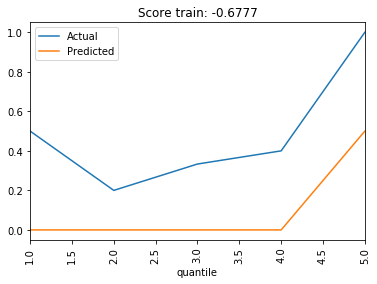

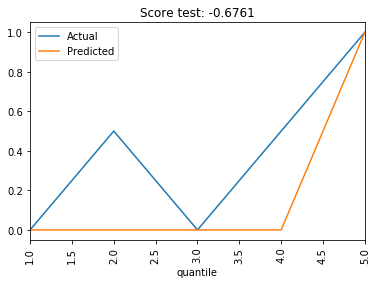

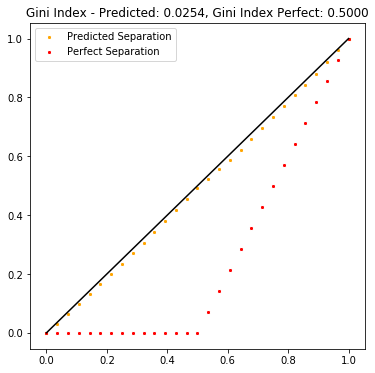

<Figure size 576x396 with 0 Axes>

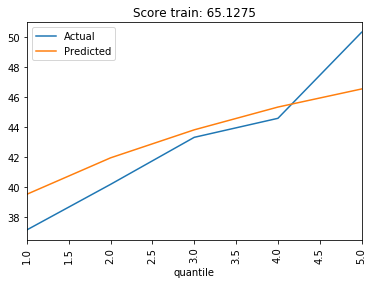

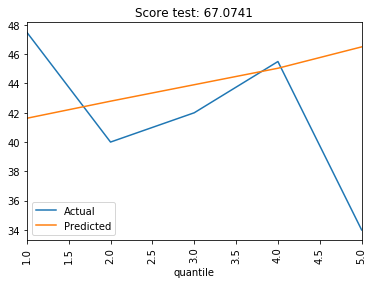

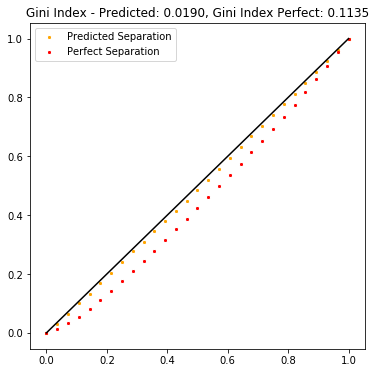

<Figure size 576x396 with 0 Axes>

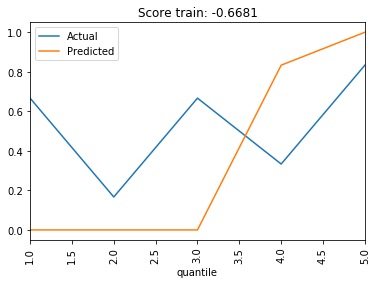

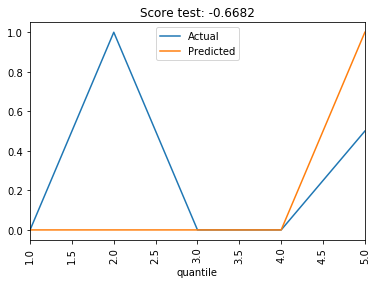

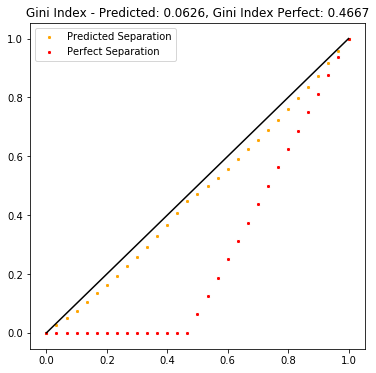

<Figure size 576x396 with 0 Axes>

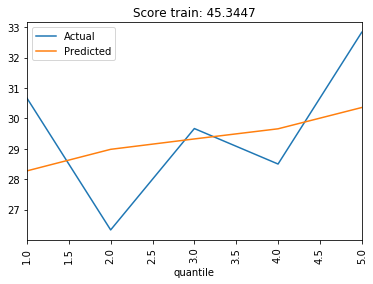

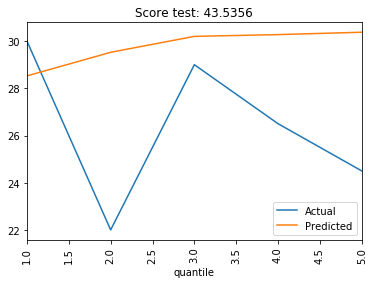

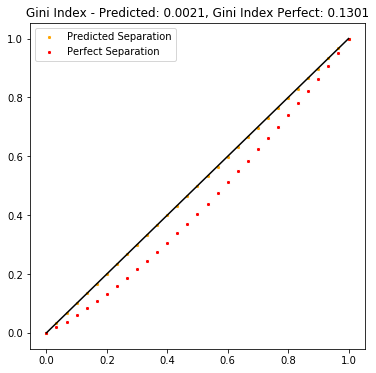

<Figure size 576x396 with 0 Axes>

In [107]:
OUTPATH_RESULTS = "results/knn/"
COLS_KEEP = ['rank_test_score', 'mean_test_score', 'std_test_score', 'param_pca__n_components', 'param_imputer__strategy',
       'param_df_selector__attribute_names', 'param_knn__n_neighbors', 'param_knn__weights', 'param_knn__metric']

output_results(knn_flourishing_scale_imp_class_post, knn_flourishing_scale_imp_class_post.cv_results_, 
               "flourishing_scale_imp_class_post", X_train, y_train, X_test, y_test, COLS_KEEP, 5, classifier=True)
output_results(knn_flourishing_scale_imp_post , knn_flourishing_scale_imp_post.cv_results_,
               "flourishing_scale_imp_post", X_train, y_train, X_test, y_test, COLS_KEEP, 5)
output_results(knn_panas_pos_imp_class_post , knn_panas_pos_imp_class_post.cv_results_,
               "panas_pos_imp_class_post", X_train, y_train, X_test, y_test, COLS_KEEP, 5, classifier=True)
output_results(knn_panas_pos_imp_post, knn_panas_pos_imp_post.cv_results_,
               "panas_pos_imp_post", X_train, y_train, X_test, y_test, COLS_KEEP, 5)


<Figure size 432x288 with 0 Axes>

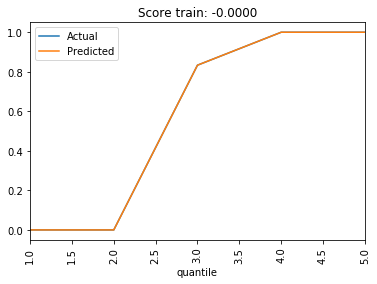

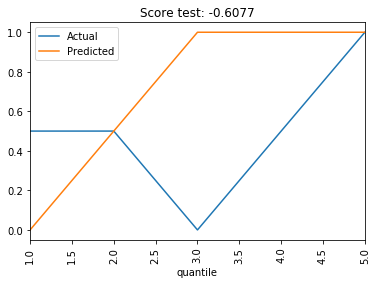

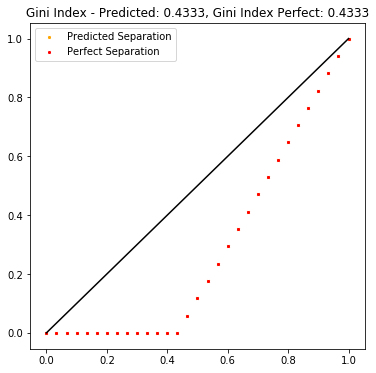

<Figure size 576x396 with 0 Axes>

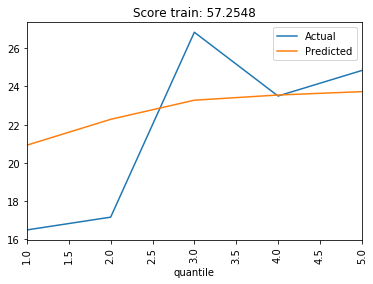

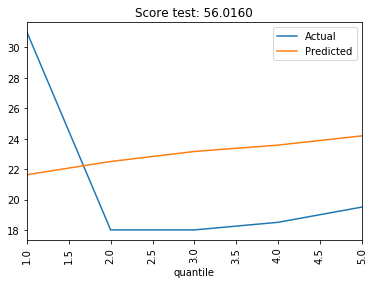

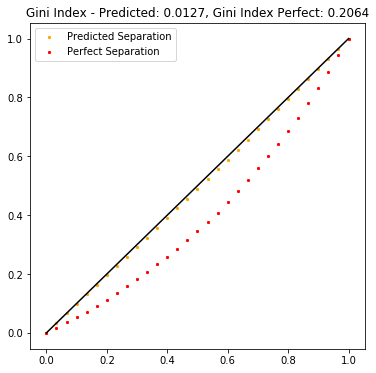

<Figure size 576x396 with 0 Axes>

In [110]:
output_results(knn_panas_neg_imp_class_post , knn_panas_neg_imp_class_post.cv_results_,
               "panas_neg_imp_class_post", X_train, y_train, X_test, y_test, COLS_KEEP, 5, classifier=True)
output_results(knn_panas_neg_imp_post, knn_panas_neg_imp_post.cv_results_,
               "panas_neg_imp_post", X_train, y_train, X_test, y_test, COLS_KEEP, 5)